## DS 7331 Data Mining
## Lab 1
## 1/27/2019
## Mallory Hightower, Richard Farrow, and Brandon de la Houssaye

## Business Understanding

What does it take to win a gold medal in the Olympics?  Is it lots of sweat, perseverance, good coaching, or maybe a key competitor mis-hap?  Yes, perhaps, but what role does genetics such as your height or weight play?  What about the actual sport?  Before you even begin playing (or picking your Olympic sport), does it matter what country you’re from?  Perhaps your country is known for producing downhill skiers.  Or maybe sprinters?

The team comprised of Mallory Hightower, Richard Farrow, and Brandon de la Houssaye (“team”) have set out to explore these questions with the stated goal of being able to establish a predictive model that answers two key questions:
-	Can we predict the likely gold (and silver, and bronze) medal winner in any given event (sport) for a given Olympic games? and, potentially
-	Can we predict the relative medal count for a given country for a given Olympic games?

In order to create the predictive model, the team utilized a Kaggle data set titled “athlete_events.csv” from the website: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results#athlete_events.csv. This dataset is hereinafter referred to as “data”.  Why this data was collected initially (by the Kaggle community) is not readily apparent, but it can be surmised that the initial intent encompassed ‘intellectual curiosity’ as well as ‘establishing information for the data science community’.  However, the team selected this particular data after exploring many other forms of data (ranging from information about wine, air travel, public education data, and housing data), and the decision ultimately came down to having a robust set that contained both categorical and continuous variables; contained a domain of interest; and ultimately met the parameters as set out in the MSDS course ‘Data Mining’.  Lastly, as mentioned, sports are fun and culturally significant.  There is a lot of resources – globally – invested towards the Olympic games in particular and the team wants to understand the games, athletes, and sports in a deeper manner.  

This dataset, which will be described in greater detail below, provides Olympic results back to 1896 (i.e., the first modern Olympics game held in Athens, Greece).  Given the sheer number of Olympic games held (summer and winter), as well as the changing of sports, athletes, and countries represented, the team is anticipating that this dataset will be sufficient for establishing the adequate variables as well as training sets and testing tests to not only build various models (for prediction), but to also determine their relative efficacy.  

The means of determining whether one model (or any model) was effective for the stated predictive goals has not yet been finalized by the team.  However, we do know that what we are trying to predict is categorical as well as continuous.  Predicting whether an athlete will win a medal is a categorical prediction.  The teams expects to use tenfold cross validation and measure accuracy, recall, and precision of the associated model.  A potential metric here would be AUC.  Predicting the number of medals by country is a continuous variable, and the team expects to utilize a regression model and assess its effectiveness using means squared error (MSE).  In any case, the team reserves the right to consider various models as well as metrics for measuring the respective models (both categorical and continuous) as the analysis progresses.  

Overall, this team is excited about analyzing this data set for multiple reasons.  The team is curious to understand what external factors to an athlete influences Olympic success (as defined by medals).  What role, for instance, does the country of origin play in determining the likelihood of Olympic success.  What follows, in this particular submission, is additional detail around the initial data set including the variables, number of observations, quality of data, initial data statistics, as well as exploratory data analytics.  This submission also contains discussion and exploration of additional data that may likely be included into future submissions that could strengthen the predictive capabilities of any model explored.  

Importantly, the information to be analyzed in creating future models, including the data set as well as any future variables for inclusion, will focus on external attributes to the athlete.  As an example, this data will not measure or consider an athlete’s performance outside of the Olympic games; an athlete’s resources or coaching; or even personal characteristics of an athlete than can be described as ‘intangibles’ such as desire or drive.  


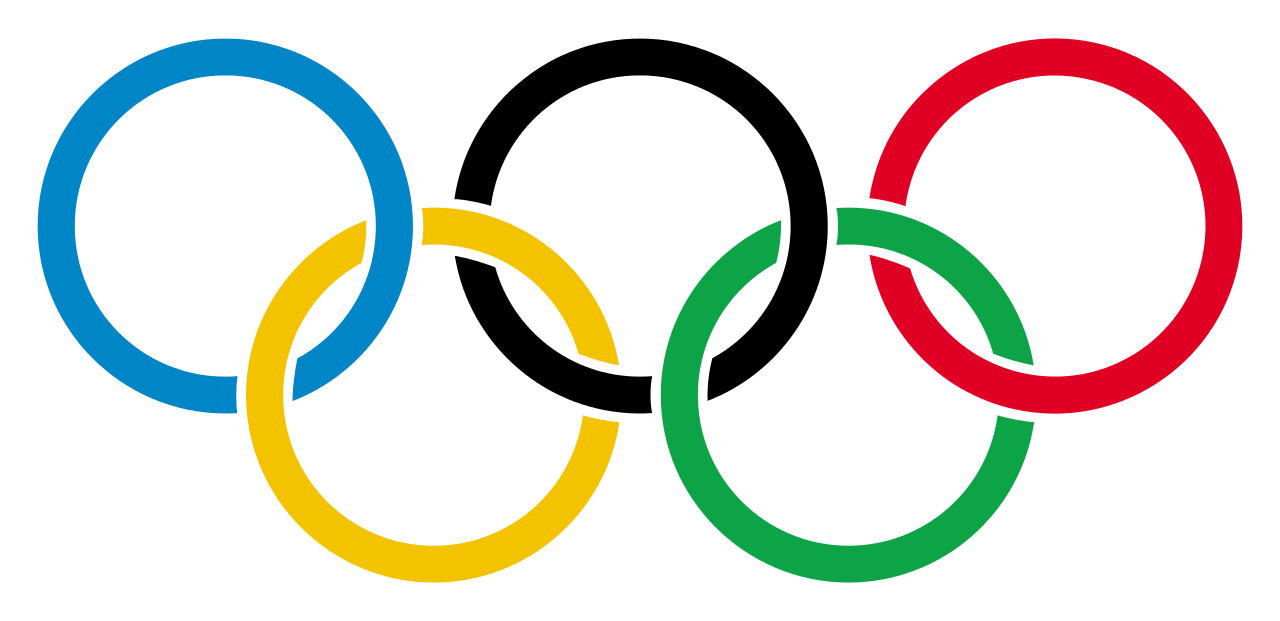

In [1]:
#Olympic rings
#image courtesy of Google
from IPython.display import Image
Image("C:\\Users\\Mallory\\Documents\\SMU\\Data Mining\\olympic rings.png", width=500, height=300)

The famous Olympic rings represent the five continents of the world that were originally united for the Olympics: 
North America, South America, Africa, Asia, Australia, and Europe.

Now they represent athletic unity in general.

## Data Meaning Type
The data set contains 15 variables and 271,116 rows of observations.  A single observation represents a particular athlete in a given sport, even, and Olympic games.  The variables are as follows:

-	ID:  this is a unique identifier given to a particular athlete.  Athletes may participate in multiple, games, sports, and events, so there are repeats of the ID through the data set.
-	Name:  this is the unique name given to a particular athlete.  As each ID is assigned to each unique name, the names also repeat throughout the data set.
-	Sex:  an athlete is listed as either male (“M”) or female (“F”).  This is a binary category; all athletes are assigned into one of these categories.  The Olympic games establish competition within these categories (i.e., males compete against other males)
-	Age:  this is the age of the athlete at that particular point in time of the observation (i.e., the age of an athlete will change from one Olympic even to the next).  Age is measured in years.
-	Height:  this is the given height in centimeters for an athlete.  This is a continuous variable.
-	Weight:  this is the given weight in kilograms for an athlete.  This is a continuous variable.
-	Team:  this is the athlete’s team and teams are formed according to representing country (e.g., USA, Canada, etc.)
-	NOC:  this is the abbreviation of a country (i.e., China = “CHN”)
-	Games:  this is in reference to the Olympic event.  Olympic events are typically denoted by year of the even and whether it is summary or winter.  
-	Year:  this is in reference to the Games year of occurrence 
-	Season:  this is in reference to whether the Games was ‘Summer’ or ‘Winter’.
-	City:  this variable details the city where the Olympic event was held.  Olympic events have historically been awarded or held within a particular host city.  
-	Sport:  this variable provides the sport of competition (i.e., downhill skiing)
-	Event:  within a given sport there may be multiple events (such as distances or, for swimming, stroke)
-	Medal:  this variable indicates what medal was won.  The choices for this categorical variable include ‘Gold’, ‘Silver’, ‘Bronze’, and ‘NA’.  The last class, ‘NA’, indicates that no medal was won.

As can be seen above, there are a number of observations as well as variables to the data set.  Additionally, the variables considered include both continuous and categorical variables.


## Data Quality
The historic dataset for various olympic games contains 13 attributes and 271,116 observations. In our quality analysis we will be looking for the following information:

- **Relevancy:** Will the attributes in the dataset add value to the predictive capabilities of our model? For example, a unique identifier or the individual athlete's name will likely need to be removed from our feature list
- **Data Types:** Are the features represented with the appropriate data type? Rather than a generic object which cannot be used to compute some descriptive statistics, we will need to cast these types to an integer or a float 
- **Outliers:** Does the dataset have values that are outside of the norm? Likely candidates for outliers in our datasert are within Age, Height, and Weight
- **Missing Values:** Are there instances of missing values and is the missing value appropriate? We will need to determine how to impute missing values if appropriate to ensure that features are adequately calculated in our analysis (e.g., probability of winning a gold medal in a particular year) 
- **Duplicates:** Although duplicate observations will need to be explored; howerever, we will assume that an athlete can compete in multiple sports and/or events

#### Relevancy:
After examining all the attributes, ID has been determined to produce little value in its predictive capabilities. 
ID is merely a way of assigning a unique ID number to each athlete.
We will remove ID from our dataset for ongoing analysis.

In [1]:
#load the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image 

#import the data
df_no_edit = pd.read_csv("C:\\Users\\Mallory\\Documents\\SMU\\Data Mining\\LAB data\\athlete_events.csv")

#drop the ID column
df_no_edit = df_no_edit.drop(['ID'], axis=1)

#view the data
df_no_edit.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#### Data Types:
In reviewing the data types in our remaining list of features, continuous variables such as Height and Weight are properly imported into the data frame as float values. All categorical values such as Team, NOC, Games, Season, City, Sport, Event, and Medal are correctly represented as objects. Lastly, the Year attribute was imported as an int. One can argue that Age is an ordinal value and should be converted to an integer; however, we do not see significant gains in performing this manipulation. 

The output below indicates missing values in Age, Height, Weight, and Medals but we will discuss this in a later section.

In [2]:
df_no_edit.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#### Outliers
In reviewing the min, max, mean and standard deviation of our data, there are no significant outliers that need to be removed. We expand on this further in the Simple Statistics section of our analysis but in summary, values seem to adequately represent a normal population of olympic athletes. Although we saw a number of missing values above, we now understand that there are no continuous attributes that are represented by zeros and feel comfortable proceeding in our analysis. 

Although there are no international regulations around the age of a participating athlete, an article published by CNN in 2016 describes Oscar Swahn as the oldest medalist in Olympic history. Oscar was a Swedish shooter who was 72 when he competed in his third and final Olympic game in 1920. He ended his career with a total of six medals three of which were gold. Therefore, although 97 was an unexpected maximum for Age, we will assume the entry is accurate. 

In [3]:
#examine the summary statistics of the data
df_no_edit.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


Summary statistics for the continuous variables confirm that missing values are properly logged as NaN (Not a Number). Additionally, all minimums are higher than zero. This is important becaue it would not make sense to have a negative height, weight, year, or age value. If we saw such values we would need to question the integrity of our dataset. 

#### Missing Values

In [4]:
#deterimne the count of missing values (NaN) 
print(df_no_edit.isnull().sum(axis = 0))

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


There appear to be a significant amount of missing values in Medal: 231,333. We can assume that these missing values in Medal simply indicate that the athlete did not receive a medal for that game and sport. We will change the NaN values in Medal to "None".

However, Age, Height, and Weight are suspect and will need to be addressed through imputation. There are 9474 missing values in Age, 60171 missing values in Height, and 62875 missing values in Weight. We will determine the best way to impute these missing values later on. But first, we want to examine more statistics for the attributes that have NaN.

In [5]:
#examine Age, Height, and Weight
print(df_no_edit.Age.min(),df_no_edit.Age.max(), round(df_no_edit.Age.std(),2), df_no_edit.Age.median(), round(df_no_edit.Age.mean(),2))
print(df_no_edit.Height.min(),df_no_edit.Height.max(), round(df_no_edit.Height.std(),2), df_no_edit.Height.median(), round(df_no_edit.Height.mean(),2))
print(df_no_edit.Weight.min(),df_no_edit.Weight.max(), round(df_no_edit.Weight.std(),2), df_no_edit.Weight.median(), round(df_no_edit.Weight.mean(),2))

10.0 97.0 6.39 24.0 25.56
127.0 226.0 10.52 175.0 175.34
25.0 214.0 14.35 70.0 70.7


It looks like the mean and median of each variable are all very close. This is good news because it indicates that the variables have a symmetrical distribution... which indicates that these variables are normally distributed (which is what we would like for our data!). We now just have to figure out the best way to impute the missing values for these variables.

In [6]:
#impute Age, Height, Weight, and Medal

#replace NaN with mean of column
df_no_edit['Weight']=df_no_edit['Weight'].fillna(df_no_edit['Weight'].mean())
df_no_edit['Height']=df_no_edit['Height'].fillna(df_no_edit['Height'].mean())
df_no_edit['Age']=df_no_edit['Age'].fillna(df_no_edit['Age'].mean())

#replace the NaN in medal to "None"
df_no_edit["Medal"].fillna("None", inplace = True)

#view the data again
df_no_edit.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


Why did we choose to impute Weight, Height and Age just based off the mean of the respective variables? We tried multiple imputation methods, including imputing based off the other variables. However, we ran into a few problems. Height and Weight are similar variables, so it makes sense to use the Height to impute the Weight. Unfortunately, when the Height is missing, the Weight is also missing, and vice versa. So we could not use this method, the most logical method, to imput either variable.

We next tried to impute based off other variables, such as based off the Age and the Sex. When we compared the imputed values from this method to the simple average of the attriubutes method (comparing the mean, medians and individual values of the variables of both methods), the resulting Height, Weight, and Age variables just were not that differnet. In fact, they were almost identical in many cases. Becuase of this, we chose to keep our code simple and just impute the missing Age, Weight, and Height attributes based off their respective averages. 

In [7]:
#examine the count of missing values (NaN) again
print(df_no_edit.isnull().sum(axis = 0))

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


Our imputation worked! No more missing values in the data.

In [8]:
#examine the summary statistics of the newly imputed attributes
print(df_no_edit.Age.min(),df_no_edit.Age.max(), round(df_no_edit.Age.std(),2), df_no_edit.Age.median(), round(df_no_edit.Age.mean(),2))
print(df_no_edit.Height.min(),df_no_edit.Height.max(), round(df_no_edit.Height.std(),2), round(df_no_edit.Height.median(),2), round(df_no_edit.Height.mean(),2))
print(df_no_edit.Weight.min(),df_no_edit.Weight.max(), round(df_no_edit.Weight.std(),2), round(df_no_edit.Weight.median(),2), round(df_no_edit.Weight.mean(),2))

10.0 97.0 6.28 25.0 25.56
127.0 226.0 9.28 175.34 175.34
25.0 214.0 12.57 70.7 70.7


After imputing based off the mean of the attributes, the main differences are that the median Age increased by one year and 
the standard deviation of Weight decreased slightly. We did not dramatically change the characteristics of the data,
which is what we desired from our imputation method.

#### Duplicates

We are aware of duplicates in our data simply due to the nature of the data. The same athlete can participate in multiple sports. We will keep this knowledge in mind for future analysis for predicting the Medal. Otherwise, there are no concerning duplicates in the data.



## Simple Statistics

In [9]:
#statistics for the final data set
df_no_edit.describe()

,Age,Height,Weight,Year
count,271116.000000,271116.00000,271116.000000,271116.000000
mean,25.556898,175.33897,70.702393,1978.378480
std,6.280857,9.27810,12.574690,29.877632
min,10.000000,127.00000,25.000000,1896.000000
25%,22.000000,170.00000,63.000000,1960.000000
50%,25.000000,175.33897,70.702393,1988.000000
75%,28.000000,180.00000,75.000000,2002.000000
max,97.000000,226.00000,214.000000,2016.000000


Above are the statistics for the final data set that we will use in this analysis.

The minimum of the Age attribute is 10 and the maximum value is 97, yet the standard deviation is smaller than the other continuous variables. This suggests that Age is a more tightly distributed variable than the other attributes. 

However, Height and Weight still have relatively small standard deviations, also susggesting that there is an ideal height and weight range for Olympic athletes. 

The mean of Age is about 26, which corresponds with our separate research of prime ahtletic age. Someone should tell the aging Nadal and Federer that if they keep winning Olympic medals they will bring the mean age up! (at least for tennis)

The mean Height is 175 cm, or about 5.7 feet. This seems short because I always consider athletes to be much taller than the average person (average male height is 5.6 feet). However, athletes like gymnasts and equestrians bring the mean down.

In [10]:
# statistics on gold medalists
df_no_edit[df_no_edit.Medal=='Gold'].describe()

,Age,Height,Weight,Year
count,13372.000000,13372.000000,13372.000000,13372.000000
mean,25.897205,177.356215,73.372088,1973.131618
std,5.860293,9.867610,13.397911,34.179153
min,13.000000,136.000000,28.000000,1896.000000
25%,22.000000,173.000000,66.000000,1952.000000
50%,25.000000,175.338970,70.702393,1984.000000
75%,29.000000,183.000000,80.000000,2002.000000
max,64.000000,223.000000,170.000000,2016.000000


Above are statistics for just the gold medalists. 

It looks like gold medalists tend to be slightly younger, slighty taller, and slightly heavier than the average Olympic athlete population. 

Gold medalists also have a tighter Age distribution than the Olympic athlete population at large with a standard deviation of 5.8. Younger Olympic athletes seem more likely to win gold medals.

However, the Height and Weight standard deviations are actually greater for the Olympic gold medalists.

In [11]:
#gold medal winner
#image courtesy of Google
Image("C:\\Users\\Mallory\\Documents\\SMU\\Data Mining\\goldmedal.jpg", width=400, height=400)

TypeError: 'module' object is not callable

Fun fact: When you are winning gold you are actually winning silver. Gold medals are 92.5% silver. The last time a gold medal was a true gold medal was the 1912 Summer Olympics. source: Wikipedia  

In [ ]:
#looking at the median medal count by Sex
df_no_edit.groupby(by=['Sex','Medal']).median()

This chart shows that the median Age of Olympians is nearly the same for males and females, 
with females being about a year younger than males and two years younger than males in the None medal category.

The median Height for male Olympians, regardless of the medal, is on average taller than female Olympians as is the Weight.
Although this knowledge is rather intuitive, it is nice to have it confirmed by the data!

In [12]:
#Looking at the percentage of athletes winning gold, silver, bronze, or none
print('Percent of all athletes to receive gold: ' + str(len(df_no_edit[df_no_edit.Medal == 'Gold'])/len(df_no_edit)*100))
print('Percent of all athletes to receive silver: ' + str(len(df_no_edit[df_no_edit.Medal == 'Bronze'])/len(df_no_edit)*100))
print('Percent of all athletes to receive bronze: ' + str(len(df_no_edit[df_no_edit.Medal == 'Silver'])/len(df_no_edit)*100))
print('Percent of all athletes to receive no medal: ' + str(len(df_no_edit[df_no_edit.Medal == 'None'])/len(df_no_edit)*100))

Percent of all athletes to receive gold: 4.932206140545007
Percent of all athletes to receive silver: 4.903805013352218
Percent of all athletes to receive bronze: 4.837781613774178
Percent of all athletes to receive no medal: 85.3262072323286


Here we are looking at the percentage of athletes winning gold, silver, bronze, or no medals. 

The percentage is about the same for gold, silver, and bronze medal categories: 4.8-4.9%. 
However, the None medal category is 85%.

This simple statistic indicates that even if you get to the Olympics, only about 15% of athletes receive a medal.
As if just getting to the Olympics wasn't hard enough! 
I know one Olympian who made it to the Olympics but was in that 85% of no medal. She was still very happy to be there.


## Visualize Attributes

Text(0.5,1,'Boxplot of Height (centimeters)')

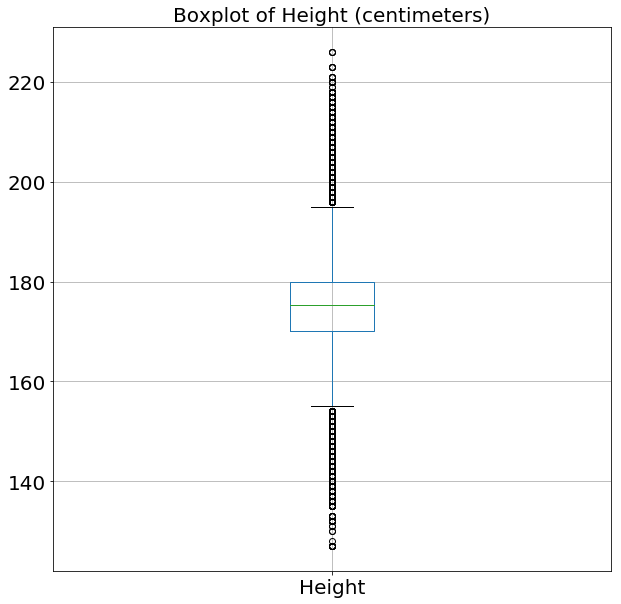

In [13]:
# box plot of Height variable
df_no_edit.boxplot(column=['Height'], fontsize=20, figsize=(10, 10))
plt.title("Boxplot of Height (centimeters)", fontsize=20)

The above box plot show the continuous variable, Height, split up into quartiles. The box plot does a great job of showing
the distribution and variability of the Height variable but also other metrics, such as the median and the quartile ranges.This is why the boxplot was chosen for this variable view as opposed to other distribution plots. 

The median height of the athletes looks to be about 175 centimeters, or 5.7 feet. The Inter-quartile range is 170-180 
centimeters, which means that the middle 50% of athletes have a height between these two values.

25% of athletes have a height taller than 180 centimeters and 25% of athletes have a height shorter than 170 centimeters. 
Exlcuding outliers there is a max height of about 195 centimeters and a min height of about 155 centimeters. 
There are also several outliers, with a height as low as about 125 cm (4 ft) and a height as high as about 225 cm (7.4 ft).

These outliers are very interesting and may belong to a very short gymnast or a very tall basketball player. 
If you are interested in being an Olympian, it looks like being 5.7 feet tall is a good starting point!
It will be interesting to later break down height by sport, country, or year.


Text(0.5,1,'Boxplot of Weight (kilograms)')

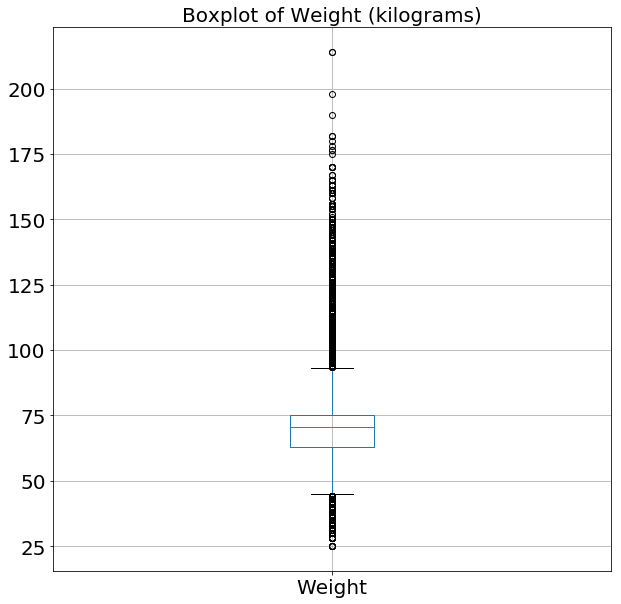

In [14]:
# box plot of Weight variable
df_no_edit.boxplot(column=['Weight'], fontsize=20, figsize=(10, 10))
plt.title("Boxplot of Weight (kilograms)", fontsize=20)

The above box plot show the continuous variable, Weight, split up into quartiles. The box plot does a great job of showing
the distribution and variability of the Weight variable but also other metrics, such as the median and the quartile ranges. This is why the boxplot was chosen for this variable view as opposed to other distribution plots.

The median weight of the athletes looks to be about 70 kilograms, or 154 pounds. The Inter-quartile range is 60-75 
kilograms, which means that the middle 50% of athletes have a weight between these two values.

25% of athletes have a weight greater than 75 kg and 25% of athletes have a weight less than than 60 kg. 
Exlcuding outliers there is a max weight of about 90 kg and a min weight of about 45 kg. 
There are also several outliers, with a weight as low as about 25 kg (55 lbs) and a weight as high as about 215 kg (474 lbs).

The outlier of 215 kg is insane and actually belongs to a man named Ricardo Blas, Jr. He is from Guam and competed in the 2008 and 2012 summer olympics in Judo. Unforuntaely, he did not win gold, medal, or bronze. 

It will be interesting to later break down weight by sport, country, or year. Breaking down the Weight variable will help us answer questions like "are Olympians getting heavier over time?" or "which sports have the highest average weight and what is that value?".

In [15]:
#athlete image
#image courtesy of Google
Image("C:\\Users\\Mallory\\Documents\\SMU\\Data Mining\\ricardo.JPG", width=300, height=300)

TypeError: 'module' object is not callable

Here is the heaviest Olympic athlete of all time, Ricardo Blas, Jr.

Text(0.5,1,'Boxplot of Age (years)')

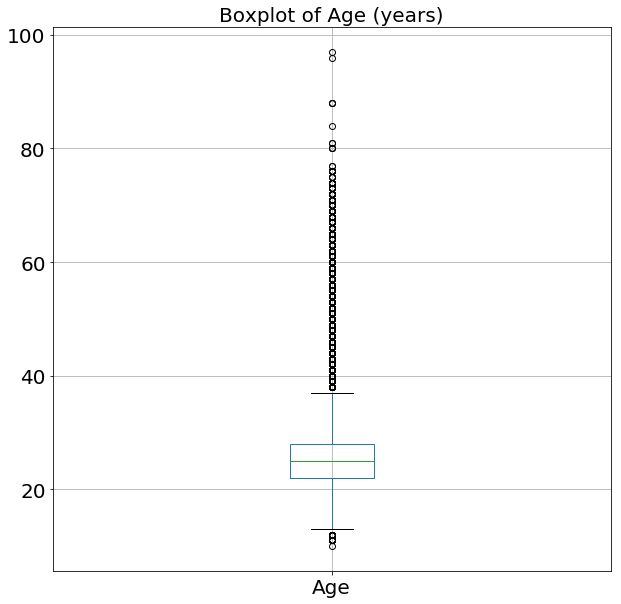

In [16]:
# box plot of Age variable
df_no_edit.boxplot(column=['Age'], fontsize=20, figsize=(10, 10))
plt.title("Boxplot of Age (years)", fontsize=20)

The above box plot show the categorical variable, Age, split up into quartiles. The box plot does a great job of showing
the distribution and variability of the Weight variable but also other metrics, such as the median and the quartile ranges. This is why the boxplot was chosen for this variable view as opposed to other distribution plots.

The median age of the athletes looks to be about 25 years. The Inter-quartile range is about 22-28 
years, which means that the middle 50% of athletes have an age between these two values.

25% of athletes are older 28 years and 25% of athletes are younger than than 22 years. 
Exlcuding outliers there is a max age of about 35 years and a min age of about 10 years. 
There are also several outliers, with an age as young as about 10 years and an age as old as about 97 years.

The outlier of 10 years old is extremely puzzling. This athlete is Dimitrios Loundras who competed for Greece in the 1896 summer games and won bronze in gymnastics! It makes sense that the very young athlete is a gymnast, because younger gymnasts tend to be better gymnasts (less weight, more flexible, etc.). This reminds me of the Chinese scandal not too long ago of faking birth certificates for their female gymnasts, so the girls were much younger and had a higher potentional of winning. Although there is no age limit for the Olympics, certain sports have lower age limits. One of those sports is gymnastics. It was ruled in 1997 that the lower age limit for gymnasts is 16.

If you are at the ripe old age of 97 and want to compete in the Olympics, you have hope! 
John Quincy Adams Ward, age 97, competed for USA in the 1928 summer games in the extremly intense and arduous sport of Art Competitions.


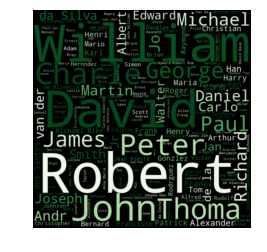

In [17]:
# Create Wordcloud of the Names variable
#rings_mask=np.array(Image.open("C:\\Users\\Mallory\\Documents\\SMU\\Data Mining\\1280px-Olympic_rings_with_transparent_rims.png"))
wordcloud = WordCloud(width=600, height=600, colormap="Greens").generate(' '.join(df_no_edit['Name']))
plt.figure()
 
# Display the Wordcloud:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

The above Wordcloud shows the relative frequency of the names of all the Olympic athletes. The more often a name occurs, the larger it is in size in respect to the other names. The largest names displayed are the most common names for Olympic athletes. 

Robert, David, William, Charle, James, and George are all very common Olympic athlete names. These names are traditional Anglo-Saxon white male names, which suggests that white is the most common race of Olympic athletes. Not only does this image reflect the most common race of Olympic athletes, it also overwhelmingly reflects the most common gender: male. 

The Wordcloud was chosen to visualize the Names attribute because names are categorical variables, which are often more difficult to visualize. The Wordcloud is not only a fun way to analyze this categorical variable, but it also demonstrates a lot about the athletes! Wordclouds are not pefect though, and because they input the entire athlete's name, you see words such as "Jr." and "de la." The Wordcoud is still great for the Names attribute because from this simple Wordcloud, we can generally infer that most Olympic athletes are white males.


Text(0.5,1,'Count of Male and Female Olympic Athletes')

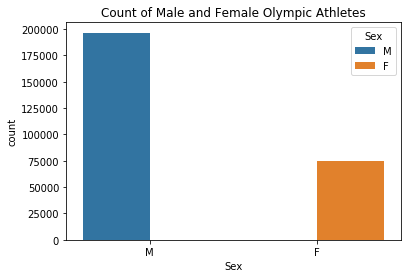

In [18]:
sns.countplot(x="Sex",hue="Sex", data=df_no_edit).set_title("Count of Male and Female Olympic Athletes")

The above plot shows the count of male and female Olympic athletes using the Sex attribute. A bar chart was chosen for this plot because gender is esentially a boolean variable on the same scale, so a bar chart is the easiest way to visualzie the counts side by side.

It is obvious from this plot that there have been many more male Olympic athletes than female Olympic athletes. There have been approximately 200,000 male Olympic athletes and approximately 75,000 female Olympic athletes since the 1896 Olympics. In fact, females were not competing in the Olympics until 1900. This plot further demonstrates that women are not as well represented as men are in the Olympics. While this fact is not necessarily good or bad, it is an interesting facet of the data.

## Explore Joint Attributes

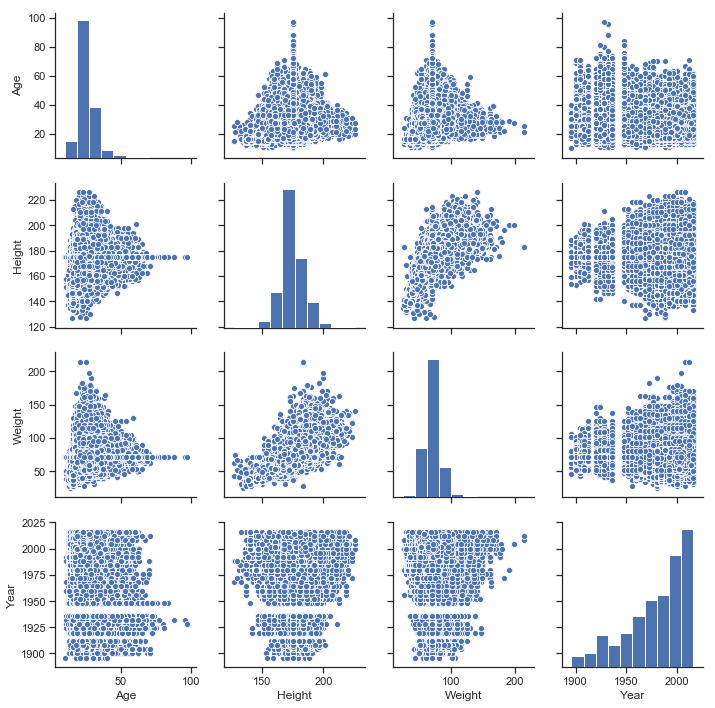

In [19]:
#examine the histograms and the scatterplots
sns.set(style="ticks")
sns.pairplot(df_no_edit)
plt.show()

The first thing I like to do when visualizing any relationships between attributes is to use a histogram and 
scatterplot matrix. This type of plot is useful because you can easily and quickly see the relationships between all the combinations of continuous variables. You can also see the distribution of the continuous variables and see if there are any abnormal distributions that require a second look.

From the above charts, it looks like the data is normally distributed (with the exception of year). This is good to know, but even if the data was not normally distributed, the central limit theorem would kick in with a population as large as this data set. 

As far as relationships between attributes, it only looks like the Weight and Height attributes are correlated. The correlation also looks like a strong positive correlation: as weight increases height increases and vice versa. This relationship makes sense intuitively but it is nice to have it confirmed by the data. 

The only other obvious conclusion from the above charts is that there is data missing around year 1940 and around 1915. 
It turns out that the world does not celebrate with sports and games during major times of conflict. 
The 1916 Summer Olympics were cancelled for World War One and the Summer and Winter Olympics of 1940 and 1944 were cancelled for World War Two. These are the only years that the modern Olympics have been cancelled. 

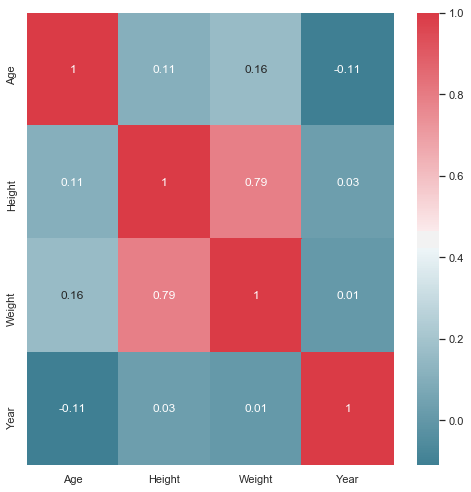

In [20]:
#look at the heat map of the correlation matrix using seaborn
sns.set(style="darkgrid") # styles for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True) # color mapping

f, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(round(df_no_edit.corr(),2), cmap=cmap, annot=True)

f.tight_layout()

In [21]:
print(sns.__version__)

0.9.0


Another great plot is the above heat map correlation matrix. This type of plot is useful when you are looking at several
variables and just want to have a quantifiable correlation value. If variables are highly correlated it may be a good 
idea to leave out one of the variables from a model and keep the model as simple as possible. You do not need 
multiple variables explaining the same variance in the response variable. The heat map is especially useful because the human eye
is able to immediately distinguish which variables are highly correlated with the colors and the color scale.

In this plot, the dark red cells are highly correlated and the dark blue cells are not correlated. The diagonal cells have a correlation
coefficient of 1, which means perfect correlation (which is assumed because the diagonal is the variable plotted against itself). 

The plot confirms that the only variables that are highly correlated are height and weight. The correlation coefficient is 0.79, which means
a high positive correlation between height and weight. 
Although this is a high correlation, it is not high enough to warrant removing one of the variables from a future model. 
A good rule of thumb is to be wary of variables who have a correlation coefficient greater than 0.8.
The next highest correlated variables are age and weight. With a correlation coefficient of 0.16, these two variables are only slightly 
positively correlated. 

Age and year, on the other hand, are very slightly negatively correlated with a correlation coefficent of -0.11. This indicates that there
are slightly fewer older athletes participating in the Olympics as time goes on. Over time, this may push the median age of Olympic
athletes down.

With this chart we are able to quickly quantify correlations between our continuous variables, a necessary step for future
model development. 

Text(0.5,1,'Age Distribution per Team')

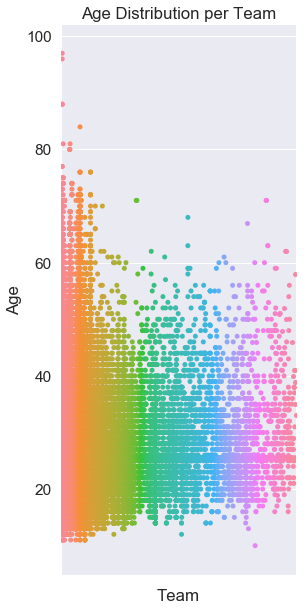

In [22]:
#visualize Team and Age attributes 
sns.set(font_scale=1.4)
plot=sns.catplot(x="Team", y="Age", data=df_no_edit)
plot.set(xticklabels=[])
plot.fig.set_size_inches(10,10)
plt.title('Age Distribution per Team') 

The above catplot was chosen for this data visualization because both Team and Age are categorical variables and
the seaborn catplot is a great way to plot categorical variables. The labels for each specific team on the X-axis were left out becuase there are too many teams to have a normal looking graph with a legible X-axis. 

The graph clearly shows that the age distribution for teams varies. Some countries have athletes around the same age, while other countries, specifically the country on the vertical axis, have a larger age distribution. We already know that the country with the largest age distribution
is USA with the 97 year old Olympic sculptor! This graph demonstrates that not all countries have the same aged Olympic athletes. If you are a 65 yr old Olympic athlete, you may be more likely to come from one of the countries closer to the vertical axis. It turns out that your age as an Olympic athlete may be related to what country you are from!
 
It will be interesting to view if there is any reason to this relationship in later analysis, such as the possibilty that 1st world countries have larger athlete age distributions than 3rd world countries because people in 3rd world countries do not live as long.


## Explore Attributes and Class

Text(0.5,1,'Medal Distribution per Age')

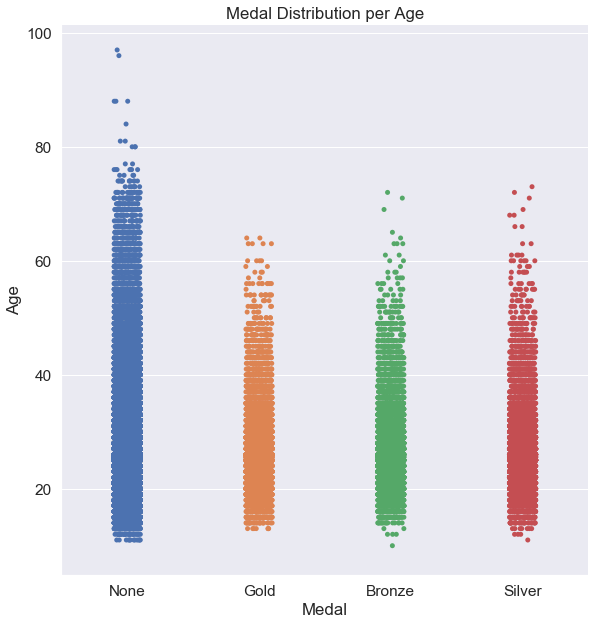

In [24]:
#visualize Medal and Age attributes 
sns.set(font_scale=1.4)
plot=sns.catplot(x="Medal", y="Age", data=df_no_edit)
plot.fig.set_size_inches(10,10)
plt.title('Medal Distribution per Age') 

The above catplot was chosen for this visualization because it plots the Medal categorical attribute in a way that is easy to 
understand and see with the medal categories side by side. It also shows the distribution and any outliers.

This plot indicates that there may be a slightly negative correlation between Age and Medal: as your age increases, 
the chance of you winning gold, medal, or silver, decreases. This is important for using age to predict the medal category.

The none medal category has a larger distribution on both ends of the age spectrum but especially on the higher end of the 
spectrum. Several of the older Olympic athletes that are outliers in the age distribution are in the "None" medal category.

There are a few older athletes who are taking home the silver and bronze medals: at least a few athletes around the age of 75.

The gold medals have the tightest age distribution with neither the youngest athletes nor the oldest athletes taking home gold.

This plot demonstrates that an older Olympic ahtlete is less likely to take home gold, bronze or silver. 
The plot also demonstrates that the youngest athletes may be taking home silver or bronze, but they aren't winning gold!
The gold medal is the tighest distribution reserved for the seasoned, but still in their prime, Olympic athletes. 



Text(0.5,1,'Medals per Sex Over Time')

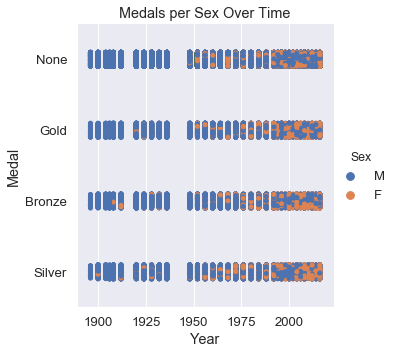

In [25]:
#visualize how the medal count has changed between genders over time 
sns.set(font_scale=1.2)
sns.catplot(x="Year", y="Medal", hue="Sex", data=df_no_edit)
plt.title('Medals per Sex Over Time') 

The above chart is an awesome graph for visualizing the difference in medal counts between men and women over time. The catplot was chosen because the Medal and Sex attributes are categorical variables, and the seaborn catplot helps visualize these attributes well. Stacking the different medal types on top of each other allows you to easily compare the different medal categories over time.

It is really neat to see the orange (F) creep up on the blue (M) as the years progress and more females participate in the Olympics. We already mentioned that the first year a female participated in the Olympics was 1900, which is confirmed in this graph. It looks like she won a Silver medal! 

It also looks like the period between 1920-1938 was an Olympic period mostly dominated by males. Females were winning very few medals during this period. This is the period right after World War One and leading up to World War Two so it is highly possible that the women needed to stay home with the family during these more tumultuos and uncertain years. A female during these years would be much less likely to win any type of medal. As the years progress, females are much more likely to win an Olympic medal. This knowledge is helpful for predicting the medal count based on gender and year.

Text(0.5,1,'Height Distribution for Medals')

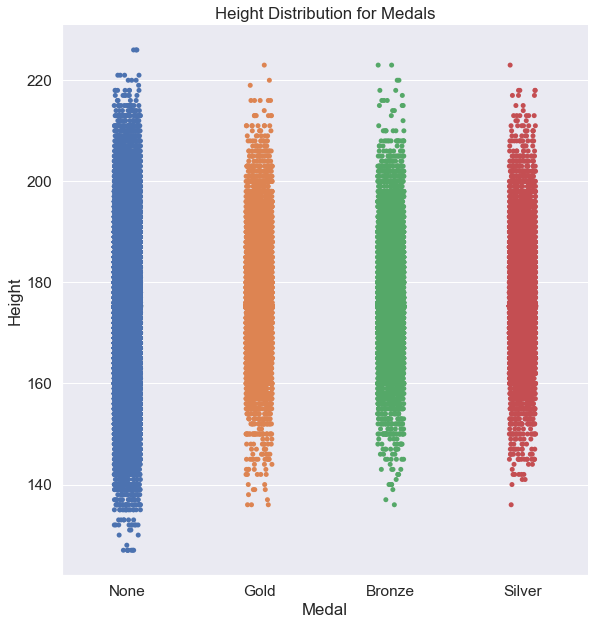

In [26]:
#visualize Medal and Height attributes 
sns.set(font_scale=1.4)
plot=sns.catplot(x="Medal", y="Height", data=df_no_edit)
plot.fig.set_size_inches(10,10)
plt.title('Height Distribution for Medals') 

The above catplot was chosen for this visualization because it plots the Medal categorical attribute in a way that is easy to 
understand and see with the medal categories side by side. It also shows the distribution and any outliers.

This plot indicates that there is an ideal height for Olympic athletes. Since we are trying to predict gold medal count, we now know that there is an ideal height range that is nearly identical for gold, silver, and bronze medalists. In other words, not only can you be too short to be an Olympic athlete, you can also be too tall! 

If you are just predicting medal category by height, it would be hard to classify between gold, bronze, and silver, since those height distributions are about equal. However, if you are on either side of that ideal height distribution, which is about 150 cm to 210 cm (about 5 ft-6.9 ft), you are more likely to be in the none medal category. Neither very short athletes nor very tall athletes are taking home gold, silver, or bronze. 

However, height is still relative. Because to me, 6.9 ft. tall is plenty tall! I can't imagine someone much taller than that being very coordinated, athletic, or healhty enough to be an Olympic athlete.

Text(0.5,1,'Weight Distribution for Medals')

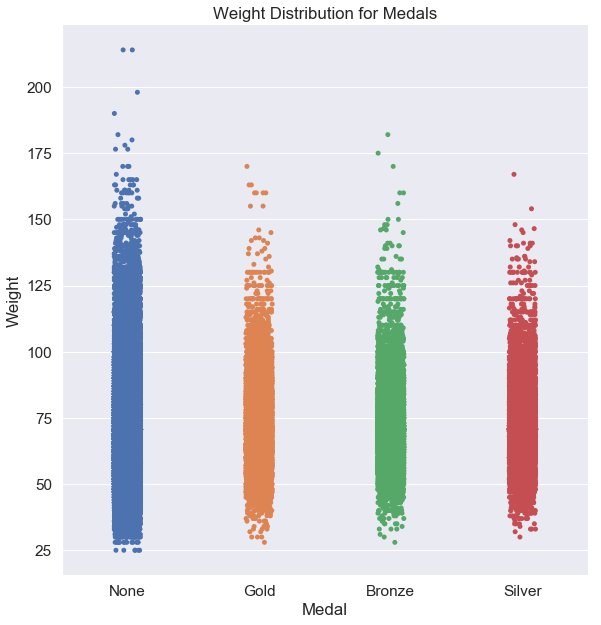

In [27]:
#visualize Medal and Weight attributes 
sns.set(font_scale=1.4)
plot=sns.catplot(x="Medal", y="Weight", data=df_no_edit)
plot.fig.set_size_inches(10,10)
plt.title('Weight Distribution for Medals') 

The above catplot was chosen for this visualization because it plots the Medal categorical attribute in a way that is easy to 
understand and see with the medal categories side by side. It also shows the distribution and any outliers.

This plot has similar conclusions as the height distribution for medals. There is an ideal weight range, around 40 kg-115 kg, for 
an Olympic athlete winning gold, bronze, or silver medals.

The none medal category has a larger distribution and has more outliers on the upper side of the weight spectrum. This suggests that 
you are a heavier athlete, you are less likely to win gold, silver, or bronze.

However, because the gold, silver, and bronze weight distributions are nearly identical, it is not enough to use only weight to predict 
what category of medal an athlete will win. There must be additional attributes in the model. 

Additionally, the simlilarity of the height and weight distributions for the different medal categories further confirms that height 
and weight are highly correlated.

## New Features

**New Features:**
The team continues to explore new features that may be included into the data set under review.  These features range from creating new variables according to already existing variables, as well as combining new data that is both meaningful as well as insightful to building a predictive model.  This is discussed in greater detail below.

**Creating New Variables:**
The team will explore the impact of team sports against individual sports.  For example, considering the impact of variables on a sprinter versus the USA basketball player John Stockton needs to account for the fact that John Stockton engaged in a team sport where the medal results were greatly impacted by, for example, Karl Malone.  
Another created variable to consider is whether a team (and therefore athlete) is competing across multiple time zones, in their own country (i.e., host country), or even on the other side of the equator.  It may be insightful to understand the impact of the distance of games on potential success.
Lastly, it goes without saying, a missing variable is total metal count by country.  The information is available in the current variables, but this new variable needs to be created.  This is a continuous variable.

**Additional Variables:**
The team is exploring the inclusion of the following data (again, this is predicated on whether the sought data is available, complete, and accurate) which is thought to be potentially meaningful:
-	Country GDP:  this may help determine whether a country’s relative wealth has an impact on Olympic success.  This data will account for a particular year of the Olympic event.
-	Country population:  does having a larger population increase the probability of success?  Can the grueling process of getting onto a particular team be more difficult than winning an event, in other words?
-	Political System:  for example, did Communism in the USSR impact the likelihood of winning a medal? 
-	Conflict:  was the country engaged in a war during the Olympic event?  What role did country turmoil (best personified by war) play in determining Olympic success?

The above list of additional data points is an example, of information the team is considering and may include into the model for future submissions.  Additional variables not listed above may be included as well to the extent these variables meet the criteria indicated previously. 


## Conclusion

We chose the Olympics data set for several reasons, including the attributes it contains (a mixture of continuous and categorical variables) 
and because we are all interested in sports! The data set also spans many years and has a great variable for regression
OR classification (Medal category or Medal count).

After editing the data, whether that be removing extraneous variables or imputing missing values, we examined the summary statistics, created useful and informational visualizations, examined attribute relationships, and provided an in-depth discussion of future attributes that we may add to enhance our data set and its predictive power.

The Olympics data set is a fun and multifaceted dataset that we look forward to working with this coming semester!


## Exceptional Work

We would like exceptional points for adding pictures to aid in the understanding of the data set and topic and for nice formatting that makes the document easy to read and follow despite its lengthy size.

We would also like exceptional points for very indepth and thoughtful discussions of all charts, graphs, plots, and output. We do not present ouput without explaining it.
These discussions also include interesting Olympic history.

We would also like exceptional points for our inclusion of a conclusion, which sumarizes the document and doesn't leave it hanging at the end after the additional variables dicusssion.

We also really like our Wordcloud if you would like to award exceptional points for that :) How else do you visualize names in a meaningful way?